In [1]:
import pandas as pd
import numpy as np
import difflib 

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dir = 'C:/Users/bamme/OneDrive/Documents/Chip_Documents/Syracuse/IST718/Project/Data/'

In [3]:
df=pd.read_excel(dir+'2018_Raw_Database_RHE.xlsx', sheet_name='UPT', engine='openpyxl')
df=df.iloc[:, 0:22].copy()


C:\Users\bamme\anaconda3\lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [4]:
#df.head()
df.columns

Index(['5 digit NTD ID', '4 digit NTD ID', 'Agency', 'Active', 'Reporter Type',
       'UZA', 'UZA Name', 'Modes', 'TOS', 'JAN18', 'FEB18', 'MAR18', 'APR18',
       'MAY18', 'JUN18', 'JUL18', 'AUG18', 'SEP18', 'OCT18', 'NOV18', 'DEC18',
       '2018_AVG'],
      dtype='object')

In [5]:
upt_df=df
upt_df=upt_df.groupby(['Agency'])['JAN18', 'FEB18', 'MAR18', 'APR18',
                                    'MAY18', 'JUN18', 'JUL18', 'AUG18', 'SEP18', 'OCT18', 'NOV18', 'DEC18', '2018_AVG'].sum()
upt_df=upt_df.reset_index(level=0)
upt_df.rename(columns = {'Agency':'Organization Name'}, inplace = True)
upt_df

C:\Users\bamme\AppData\Local\Temp\ipykernel_25724\1567376698.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  upt_df=upt_df.groupby(['Agency'])['JAN18', 'FEB18', 'MAR18', 'APR18',


,Organization Name,JAN18,FEB18,MAR18,APR18,MAY18,JUN18,JUL18,AUG18,SEP18,OCT18,NOV18,DEC18,2018_AVG
0,"2Plus Partners in Transportation, Inc",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,ATC / Vancom,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,"Academy Lines, Inc.",288667.0,268539.0,273879.0,287985.0,288273.0,291875.0,268874.0,281813.0,252656.0,305561.0,254053.0,219688.0,273488.583333
3,Access Services,177613.0,167399.0,186117.0,183038.0,194147.0,183911.0,184059.0,195671.0,182941.0,204174.0,181842.0,170680.0,184299.333333
4,Access Services,174124.0,171475.0,184839.0,184748.0,190247.0,182456.0,186493.0,197022.0,184072.0,194832.0,176451.0,168690.0,182954.083333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
804,"vRide, Inc. - Anchorage",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
805,"vRide, Inc. - Atlanta",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
806,"vRide, Inc. - El Paso",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
807,"vRide, Inc. - Tucson",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [6]:
upt_df.head()

,Organization Name,JAN18,FEB18,MAR18,APR18,MAY18,JUN18,JUL18,AUG18,SEP18,OCT18,NOV18,DEC18,2018_AVG
0,"2Plus Partners in Transportation, Inc",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,ATC / Vancom,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,"Academy Lines, Inc.",288667.0,268539.0,273879.0,287985.0,288273.0,291875.0,268874.0,281813.0,252656.0,305561.0,254053.0,219688.0,273488.583333
3,Access Services,177613.0,167399.0,186117.0,183038.0,194147.0,183911.0,184059.0,195671.0,182941.0,204174.0,181842.0,170680.0,184299.333333
4,Access Services,174124.0,171475.0,184839.0,184748.0,190247.0,182456.0,186493.0,197022.0,184072.0,194832.0,176451.0,168690.0,182954.083333


##UPT by Year

In [7]:
df2=pd.read_excel(dir+'2018_Raw_Database_RHE.xlsx', sheet_name='Calendar_Year_UPT', engine='openpyxl')
#df2=df2.iloc[:, 0:26].copy()

In [8]:
df2.head()

,5 digit NTD ID,4 digit NTD ID,Agency,Active,Reporter Type,UZA,UZA Name,Modes,TOS,2002,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,1,1,King County Department of Metro Transit,Active,Full Reporter,14.0,"Seattle, WA",DR,PT,1616625.0,...,1103355.0,1012714.0,902626.0,870776.0,854155.0,883312.0,887915.0,455391.0,468104.0,132256.0
1,1,1,King County Department of Metro Transit,Active,Full Reporter,14.0,"Seattle, WA",DR,TX,0.0,...,86383.0,96244.0,110018.0,110665.0,103861.0,143747.0,177791.0,86460.0,88944.0,24698.0
2,1,1,King County Department of Metro Transit,Active,Full Reporter,14.0,"Seattle, WA",FB,DO,0.0,...,0.0,0.0,0.0,601942.0,599954.0,664365.0,701608.0,146930.0,286843.0,59976.0
3,1,1,King County Department of Metro Transit,Inactive,Full Reporter,14.0,"Seattle, WA",LR,DO,357935.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,1,King County Department of Metro Transit,Active,Full Reporter,14.0,"Seattle, WA",MB,DO,70032459.0,...,97702518.0,99570061.0,101362882.0,100924131.0,101129569.0,103435175.0,103527532.0,48865810.0,42095443.0,12038437.0


In [9]:
df2.columns

Index(['5 digit NTD ID', '4 digit NTD ID',         'Agency',         'Active',
        'Reporter Type',            'UZA',       'UZA Name',          'Modes',
                  'TOS',             2002,             2003,             2004,
                   2005,             2006,             2007,             2008,
                   2009,             2010,             2011,             2012,
                   2013,             2014,             2015,             2016,
                   2017,             2018,             2019,             2020,
                   2021,             2022],
      dtype='object')

In [10]:
upt_yr_df=df2
upt_yr_df=upt_yr_df.groupby(['Agency'])[2018].sum()
upt_yr_df=upt_yr_df.reset_index(level=0)
#upt_yr_df.rename(columns = {'Agency':'Organization Name'}, inplace = True)
upt_yr_df.rename(columns = {2018:'2018'}, inplace = True)
upt_yr_df

,Agency,2018
0,"2Plus Partners in Transportation, Inc",0.0
1,ATC / Vancom,0.0
2,"Academy Lines, Inc.",3281863.0
3,Access Services,2211592.0
4,Access Services,2195449.0
...,...,...
804,"vRide, Inc. - Anchorage",0.0
805,"vRide, Inc. - Atlanta",0.0
806,"vRide, Inc. - El Paso",0.0
807,"vRide, Inc. - Tucson",0.0


In [11]:
station=pd.read_excel(dir+'2018_APTA_Infrastructure_Database.xlsx', sheet_name='Station Data', engine='openpyxl')

In [12]:
station = station.fillna(0)
station

,New 2018 Data,Last Data Reported Year,Organization Name,Organization Short Name,City,State,Country,Member ID,Type of Facility,Number of Stations,...,Number of Motorcycle/Moped Parking Spaces,Number of Bus/Rail Stops without Shelters,Stopnoben,Number of bicycle spaces in secure facilities - locker/facility,Number of stations with all-day auto parking,Number of stations with lockers or secure bike facility,Number of stations with bike racks,Station with Nearby Bikeshare Docks,Number of Stations with Elecric Vehcile Charging Outlets,Number of stations with WiFi access
0,No,2016,City of Phoenix Public Transit Department,City of Phoenix PTD,Phoenix,AZ,UNITED STATES,6,BUS,15,...,16,0.0,0.0,0.0,14.0,15.0,4.0,1.0,0.0,0.0
1,No,2016,City of Phoenix Public Transit Department,City of Phoenix PTD,Phoenix,AZ,UNITED STATES,6,RAIL,35,...,0,0.0,0.0,0.0,5.0,0.0,0.0,2.0,0.0,0.0
2,No,2012,City of Tucson Mass Transit System,City of Tucson MTS,Tucson,AZ,UNITED STATES,7,BUS,23,...,0,1825.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Yes,2018,Rock Region METRO,Central Arkansas TA,Little Rock,AR,UNITED STATES,8,BUS,1,...,0,1800.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Yes,2018,Rock Region METRO,Central Arkansas TA,Little Rock,AR,UNITED STATES,8,RAIL,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,Yes,2018,Bow Valley Regional Transit Services Commission,Roam Transit,Banff,AB,CANADA,98842,BUS,1,...,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
497,Yes,2018,Link Transit (City of Burlington NC),Link Transit,Burlington,NC,UNITED STATES,105173,BUS,1,...,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
498,No,2006,University of California San Francisco,0,San Francisco,CA,UNITED STATES,119308,BUS,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
499,Yes,2018,Strathcona County Transit,Strathcona County Transit,Sherwood Park,AB,CANADA,131921,BUS,2,...,0,0.0,0.0,8.0,2.0,2.0,2.0,0.0,0.0,0.0


In [13]:
station= station.drop_duplicates(subset=['Organization Name'], keep='first')

In [14]:
station

,New 2018 Data,Last Data Reported Year,Organization Name,Organization Short Name,City,State,Country,Member ID,Type of Facility,Number of Stations,...,Number of Motorcycle/Moped Parking Spaces,Number of Bus/Rail Stops without Shelters,Stopnoben,Number of bicycle spaces in secure facilities - locker/facility,Number of stations with all-day auto parking,Number of stations with lockers or secure bike facility,Number of stations with bike racks,Station with Nearby Bikeshare Docks,Number of Stations with Elecric Vehcile Charging Outlets,Number of stations with WiFi access
0,No,2016,City of Phoenix Public Transit Department,City of Phoenix PTD,Phoenix,AZ,UNITED STATES,6,BUS,15,...,16,0.0,0.0,0.0,14.0,15.0,4.0,1.0,0.0,0.0
2,No,2012,City of Tucson Mass Transit System,City of Tucson MTS,Tucson,AZ,UNITED STATES,7,BUS,23,...,0,1825.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Yes,2018,Rock Region METRO,Central Arkansas TA,Little Rock,AR,UNITED STATES,8,BUS,1,...,0,1800.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,Yes,2018,Alameda-Contra Costa Transit District,Alameda-Contra Costa TD,Oakland,CA,UNITED STATES,9,BUS,0,...,0,6150.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,No,2016,Culver City Municipal Bus Lines,Culver City MBL,Culver City,CA,UNITED STATES,13,BUS,3,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,Yes,2018,Bow Valley Regional Transit Services Commission,Roam Transit,Banff,AB,CANADA,98842,BUS,1,...,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
497,Yes,2018,Link Transit (City of Burlington NC),Link Transit,Burlington,NC,UNITED STATES,105173,BUS,1,...,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
498,No,2006,University of California San Francisco,0,San Francisco,CA,UNITED STATES,119308,BUS,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
499,Yes,2018,Strathcona County Transit,Strathcona County Transit,Sherwood Park,AB,CANADA,131921,BUS,2,...,0,0.0,0.0,8.0,2.0,2.0,2.0,0.0,0.0,0.0


In [15]:
#Pulling in comforts to include ADA accessibility and wifi
comforts=station.iloc[:,-42:]

comforts['Organization Name']=station['Organization Name']


In [16]:
comforts

,Last Data Reported Year,Organization Name,Organization Short Name,City,State,Country,Member ID,Type of Facility,Number of Stations,Number of ADA Accessible Stations,...,Number of Motorcycle/Moped Parking Spaces,Number of Bus/Rail Stops without Shelters,Stopnoben,Number of bicycle spaces in secure facilities - locker/facility,Number of stations with all-day auto parking,Number of stations with lockers or secure bike facility,Number of stations with bike racks,Station with Nearby Bikeshare Docks,Number of Stations with Elecric Vehcile Charging Outlets,Number of stations with WiFi access
0,2016,City of Phoenix Public Transit Department,City of Phoenix PTD,Phoenix,AZ,UNITED STATES,6,BUS,15,15,...,16,0.0,0.0,0.0,14.0,15.0,4.0,1.0,0.0,0.0
2,2012,City of Tucson Mass Transit System,City of Tucson MTS,Tucson,AZ,UNITED STATES,7,BUS,23,5,...,0,1825.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2018,Rock Region METRO,Central Arkansas TA,Little Rock,AR,UNITED STATES,8,BUS,1,1,...,0,1800.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2018,Alameda-Contra Costa Transit District,Alameda-Contra Costa TD,Oakland,CA,UNITED STATES,9,BUS,0,0,...,0,6150.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,2016,Culver City Municipal Bus Lines,Culver City MBL,Culver City,CA,UNITED STATES,13,BUS,3,3,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496,2018,Bow Valley Regional Transit Services Commission,Roam Transit,Banff,AB,CANADA,98842,BUS,1,1,...,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
497,2018,Link Transit (City of Burlington NC),Link Transit,Burlington,NC,UNITED STATES,105173,BUS,1,1,...,0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
498,2006,University of California San Francisco,0,San Francisco,CA,UNITED STATES,119308,BUS,0,0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
499,2018,Strathcona County Transit,Strathcona County Transit,Sherwood Park,AB,CANADA,131921,BUS,2,2,...,0,0.0,0.0,8.0,2.0,2.0,2.0,0.0,0.0,0.0


## Improved join process created by M. Flynn

In [17]:
comfortz = comforts
u2022 = upt_yr_df

comfortz_list = list(comfortz["Organization Name"])
raw_2022_list = list(u2022["Agency"])

matched = {} #{Organzation: Agency}

for i in comfortz_list:
  start = 0
  end = 4
  matches = [agency for agency in raw_2022_list if i[start:end] in agency]
  while (len(matches) > 1) and (end < len(i)):
    end +=1
    matches = [agency for agency in matches if i[start:end] in agency]
  matched[i] = [len(matches), matches]

In [18]:
comfortz['AgencyFinal'] =comfortz["Organization Name"]
#combined_df = station_df_short.merge(rawDB_df_combined, how = "inner", on="Agency")
total = 0
for i in matched:
  if matched[i][0] == 1:
    total += 1
    org_index = comfortz[comfortz['Organization Name']== i].index[0]
    #print(i, ':',org_index)
    agency_index = u2022[u2022['Agency'] == matched[i][1][0]].index[0]
    #print(matched[i][1][0],':', agency_index, "\n")
    comfortz.loc[org_index,['Organization Name']] = u2022.iloc[agency_index]['Agency']

print("total", total)
#combined_df = comfortz.merge(rawDB_df_combined, how = "inner", on="Agency")

total 302


In [19]:
u2022['Organization Name'] = u2022['Agency']
u2022

,Agency,2018,Organization Name
0,"2Plus Partners in Transportation, Inc",0.0,"2Plus Partners in Transportation, Inc"
1,ATC / Vancom,0.0,ATC / Vancom
2,"Academy Lines, Inc.",3281863.0,"Academy Lines, Inc."
3,Access Services,2211592.0,Access Services
4,Access Services,2195449.0,Access Services
...,...,...,...
804,"vRide, Inc. - Anchorage",0.0,"vRide, Inc. - Anchorage"
805,"vRide, Inc. - Atlanta",0.0,"vRide, Inc. - Atlanta"
806,"vRide, Inc. - El Paso",0.0,"vRide, Inc. - El Paso"
807,"vRide, Inc. - Tucson",0.0,"vRide, Inc. - Tucson"


In [20]:
combined_df = comfortz.merge(u2022, how = "inner", on="Organization Name")
combined_df

,Last Data Reported Year,Organization Name,Organization Short Name,City,State,Country,Member ID,Type of Facility,Number of Stations,Number of ADA Accessible Stations,...,Number of bicycle spaces in secure facilities - locker/facility,Number of stations with all-day auto parking,Number of stations with lockers or secure bike facility,Number of stations with bike racks,Station with Nearby Bikeshare Docks,Number of Stations with Elecric Vehcile Charging Outlets,Number of stations with WiFi access,AgencyFinal,Agency,2018
0,2016,City of Phoenix Public Transit Department,City of Phoenix PTD,Phoenix,AZ,UNITED STATES,6,BUS,15,15,...,0.0,14.0,15.0,4.0,1.0,0.0,0.0,City of Phoenix Public Transit Department,City of Phoenix Public Transit Department,39934087.0
1,2012,City of Tucson,City of Tucson MTS,Tucson,AZ,UNITED STATES,7,BUS,23,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,City of Tucson Mass Transit System,City of Tucson,16224721.0
2,2010,City of Tucson,0,Tucson,AZ,United States,26921,BUS,29,12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,City of Tucson,City of Tucson,16224721.0
3,2018,Rock Region Metropolitan Transit Authority,Central Arkansas TA,Little Rock,AR,UNITED STATES,8,BUS,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Rock Region METRO,Rock Region Metropolitan Transit Authority,2351440.0
4,2018,Alameda-Contra Costa Transit District,Alameda-Contra Costa TD,Oakland,CA,UNITED STATES,9,BUS,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Alameda-Contra Costa Transit District,Alameda-Contra Costa Transit District,53343328.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,2018,Napa Valley Transportation Authority,Napa Valley TA,Napa,CA,UNITED STATES,94937,BUS,3,3,...,22.0,3.0,3.0,3.0,0.0,0.0,1.0,Napa County Transportation and Planning Agency,Napa Valley Transportation Authority,1070490.0
305,2016,Solano County Transit,0,Vallejo,CA,UNITED STATES,95103,BUS,7,7,...,40.0,5.0,5.0,7.0,0.0,0.0,0.0,Solano County Transit (SolTrans),Solano County Transit,1436790.0
306,2018,Atlanta-Region Transit Link Authority,Link Transit,Burlington,NC,UNITED STATES,105173,BUS,1,1,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,Link Transit (City of Burlington NC),Atlanta-Region Transit Link Authority,0.0
307,2006,"University of California, Davis",0,San Francisco,CA,UNITED STATES,119308,BUS,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,University of California San Francisco,"University of California, Davis",3827710.0


In [21]:
comfortsUpt=combined_df
#comfortsUpt=comfortsUpt.iloc[:,:-1]
#comfortsUpt.rename(columns = {'Agency':'Organization Name'}, inplace = True)
comfortsUpt

,Last Data Reported Year,Organization Name,Organization Short Name,City,State,Country,Member ID,Type of Facility,Number of Stations,Number of ADA Accessible Stations,...,Number of bicycle spaces in secure facilities - locker/facility,Number of stations with all-day auto parking,Number of stations with lockers or secure bike facility,Number of stations with bike racks,Station with Nearby Bikeshare Docks,Number of Stations with Elecric Vehcile Charging Outlets,Number of stations with WiFi access,AgencyFinal,Agency,2018
0,2016,City of Phoenix Public Transit Department,City of Phoenix PTD,Phoenix,AZ,UNITED STATES,6,BUS,15,15,...,0.0,14.0,15.0,4.0,1.0,0.0,0.0,City of Phoenix Public Transit Department,City of Phoenix Public Transit Department,39934087.0
1,2012,City of Tucson,City of Tucson MTS,Tucson,AZ,UNITED STATES,7,BUS,23,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,City of Tucson Mass Transit System,City of Tucson,16224721.0
2,2010,City of Tucson,0,Tucson,AZ,United States,26921,BUS,29,12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,City of Tucson,City of Tucson,16224721.0
3,2018,Rock Region Metropolitan Transit Authority,Central Arkansas TA,Little Rock,AR,UNITED STATES,8,BUS,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Rock Region METRO,Rock Region Metropolitan Transit Authority,2351440.0
4,2018,Alameda-Contra Costa Transit District,Alameda-Contra Costa TD,Oakland,CA,UNITED STATES,9,BUS,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Alameda-Contra Costa Transit District,Alameda-Contra Costa Transit District,53343328.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,2018,Napa Valley Transportation Authority,Napa Valley TA,Napa,CA,UNITED STATES,94937,BUS,3,3,...,22.0,3.0,3.0,3.0,0.0,0.0,1.0,Napa County Transportation and Planning Agency,Napa Valley Transportation Authority,1070490.0
305,2016,Solano County Transit,0,Vallejo,CA,UNITED STATES,95103,BUS,7,7,...,40.0,5.0,5.0,7.0,0.0,0.0,0.0,Solano County Transit (SolTrans),Solano County Transit,1436790.0
306,2018,Atlanta-Region Transit Link Authority,Link Transit,Burlington,NC,UNITED STATES,105173,BUS,1,1,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,Link Transit (City of Burlington NC),Atlanta-Region Transit Link Authority,0.0
307,2006,"University of California, Davis",0,San Francisco,CA,UNITED STATES,119308,BUS,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,University of California San Francisco,"University of California, Davis",3827710.0


In [22]:
#comfortsUpt['Organization Name'] = comfortsUpt['AgencyFinal']
comfortsUpt.head()

,Last Data Reported Year,Organization Name,Organization Short Name,City,State,Country,Member ID,Type of Facility,Number of Stations,Number of ADA Accessible Stations,...,Number of bicycle spaces in secure facilities - locker/facility,Number of stations with all-day auto parking,Number of stations with lockers or secure bike facility,Number of stations with bike racks,Station with Nearby Bikeshare Docks,Number of Stations with Elecric Vehcile Charging Outlets,Number of stations with WiFi access,AgencyFinal,Agency,2018
0,2016,City of Phoenix Public Transit Department,City of Phoenix PTD,Phoenix,AZ,UNITED STATES,6,BUS,15,15,...,0.0,14.0,15.0,4.0,1.0,0.0,0.0,City of Phoenix Public Transit Department,City of Phoenix Public Transit Department,39934087.0
1,2012,City of Tucson,City of Tucson MTS,Tucson,AZ,UNITED STATES,7,BUS,23,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,City of Tucson Mass Transit System,City of Tucson,16224721.0
2,2010,City of Tucson,0,Tucson,AZ,United States,26921,BUS,29,12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,City of Tucson,City of Tucson,16224721.0
3,2018,Rock Region Metropolitan Transit Authority,Central Arkansas TA,Little Rock,AR,UNITED STATES,8,BUS,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Rock Region METRO,Rock Region Metropolitan Transit Authority,2351440.0
4,2018,Alameda-Contra Costa Transit District,Alameda-Contra Costa TD,Oakland,CA,UNITED STATES,9,BUS,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Alameda-Contra Costa Transit District,Alameda-Contra Costa Transit District,53343328.0


In [23]:
for i in set(list(comfortsUpt['Organization Name'])):
    tmpDF = comfortsUpt[comfortsUpt['Organization Name']==i]
    if len(tmpDF) > 1:
        if len(tmpDF) == 2:
            print(tmpDF.index[0],':', list(tmpDF['Organization Name'])[0],';', list(tmpDF['AgencyFinal'])[0])
            print(tmpDF.index[1],':', list(tmpDF['Organization Name'])[1],';', list(tmpDF['AgencyFinal'])[1], "\n")
        if len(tmpDF) == 3:
            print(tmpDF.index[0],':', list(tmpDF['Organization Name'])[0],';', list(tmpDF['AgencyFinal'])[0])
            print(tmpDF.index[1],':', list(tmpDF['Organization Name'])[1],';', list(tmpDF['AgencyFinal'])[1])
            print(tmpDF.index[2],':', list(tmpDF['Organization Name'])[2],';', list(tmpDF['AgencyFinal'])[2], "\n")
            

215 : Butler County Regional Transit Authority ; Butler Township/City Joint Municipal Transit Authority
216 : Butler County Regional Transit Authority ; Butler County Regional Transit Authority 

251 : Casco Bay Island Transit District ; Island Transit
252 : Casco Bay Island Transit District ; Casco Bay Island Transit District 

28 : San Joaquin Regional Transit District ; San Joaquin Regional Transit District
29 : San Joaquin Regional Transit District ; San Joaquin Regional Rail Commission 

85 : Central New York Regional Transportation Authority ; Central New York Regional Transportation Authority
86 : Central New York Regional Transportation Authority ; York Region Transit 

123 : Laredo Transit Management, Inc. ; Laredo Municipal Transit System
124 : Laredo Transit Management, Inc. ; Transit Management of Spartanburg 

87 : Port Authority of Allegheny County ; Port Authority of New York and New Jersey
88 : Port Authority of Allegheny County ; Port Authority of Allegheny County 

4 

In [24]:
idx_to_drop = [98, 251, 133, 176, 214, 142, 29, 138, 215, 221, 86, 87, 5, 234, 236, 124]
comfortsUpt.drop(idx_to_drop, inplace = True)

In [25]:
comfortsUpt

,Last Data Reported Year,Organization Name,Organization Short Name,City,State,Country,Member ID,Type of Facility,Number of Stations,Number of ADA Accessible Stations,...,Number of bicycle spaces in secure facilities - locker/facility,Number of stations with all-day auto parking,Number of stations with lockers or secure bike facility,Number of stations with bike racks,Station with Nearby Bikeshare Docks,Number of Stations with Elecric Vehcile Charging Outlets,Number of stations with WiFi access,AgencyFinal,Agency,2018
0,2016,City of Phoenix Public Transit Department,City of Phoenix PTD,Phoenix,AZ,UNITED STATES,6,BUS,15,15,...,0.0,14.0,15.0,4.0,1.0,0.0,0.0,City of Phoenix Public Transit Department,City of Phoenix Public Transit Department,39934087.0
1,2012,City of Tucson,City of Tucson MTS,Tucson,AZ,UNITED STATES,7,BUS,23,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,City of Tucson Mass Transit System,City of Tucson,16224721.0
2,2010,City of Tucson,0,Tucson,AZ,United States,26921,BUS,29,12,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,City of Tucson,City of Tucson,16224721.0
3,2018,Rock Region Metropolitan Transit Authority,Central Arkansas TA,Little Rock,AR,UNITED STATES,8,BUS,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Rock Region METRO,Rock Region Metropolitan Transit Authority,2351440.0
4,2018,Alameda-Contra Costa Transit District,Alameda-Contra Costa TD,Oakland,CA,UNITED STATES,9,BUS,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Alameda-Contra Costa Transit District,Alameda-Contra Costa Transit District,53343328.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,2018,Napa Valley Transportation Authority,Napa Valley TA,Napa,CA,UNITED STATES,94937,BUS,3,3,...,22.0,3.0,3.0,3.0,0.0,0.0,1.0,Napa County Transportation and Planning Agency,Napa Valley Transportation Authority,1070490.0
305,2016,Solano County Transit,0,Vallejo,CA,UNITED STATES,95103,BUS,7,7,...,40.0,5.0,5.0,7.0,0.0,0.0,0.0,Solano County Transit (SolTrans),Solano County Transit,1436790.0
306,2018,Atlanta-Region Transit Link Authority,Link Transit,Burlington,NC,UNITED STATES,105173,BUS,1,1,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,Link Transit (City of Burlington NC),Atlanta-Region Transit Link Authority,0.0
307,2006,"University of California, Davis",0,San Francisco,CA,UNITED STATES,119308,BUS,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,University of California San Francisco,"University of California, Davis",3827710.0


## End of join process

[Text(0.5, 1.0, 'UPT to Comfort Correlation Heatmap')]

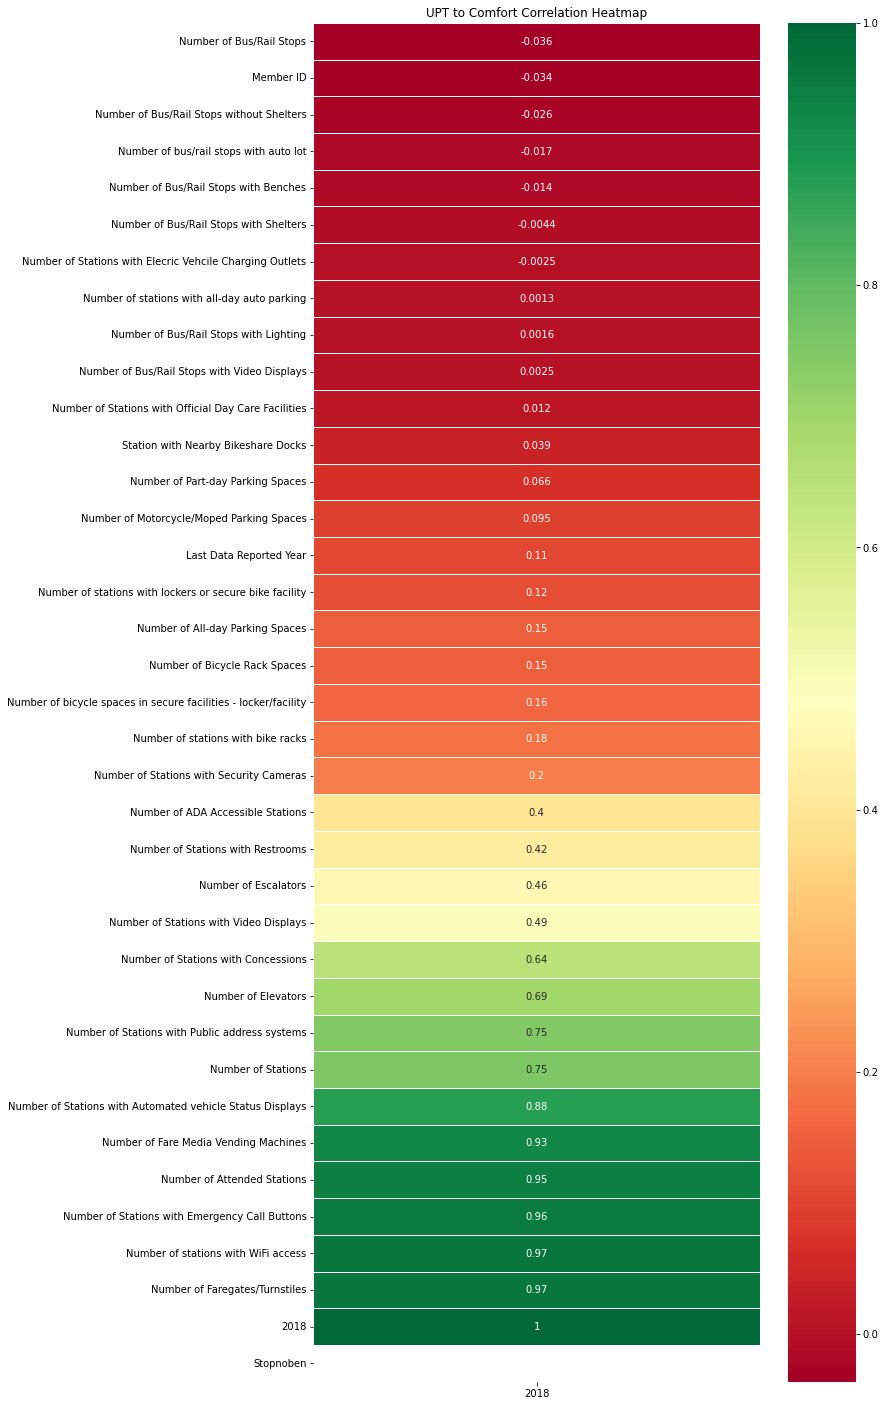

In [26]:
from matplotlib import pyplot as plt
import seaborn as sns
correlationDF=comfortsUpt.corr()
riderCor=correlationDF['2018'].to_frame()
riderCor=riderCor.sort_values('2018')
fig, ax = plt.subplots(figsize = (10, 25))
sns.heatmap(riderCor, cmap ='RdYlGn', linewidths = 0.50, annot = True).set(title='UPT to Comfort Correlation Heatmap')

In [27]:
correlationDF

,Last Data Reported Year,Member ID,Number of Stations,Number of ADA Accessible Stations,Number of Attended Stations,Number of Stations with Public address systems,Number of Stations with Automated vehicle Status Displays,Number of Stations with Video Displays,Number of Stations with Security Cameras,Number of Stations with Emergency Call Buttons,...,Number of Bus/Rail Stops without Shelters,Stopnoben,Number of bicycle spaces in secure facilities - locker/facility,Number of stations with all-day auto parking,Number of stations with lockers or secure bike facility,Number of stations with bike racks,Station with Nearby Bikeshare Docks,Number of Stations with Elecric Vehcile Charging Outlets,Number of stations with WiFi access,2018
Last Data Reported Year,1.000000,0.057912,0.182983,0.220426,0.122620,0.169577,0.180816,0.207634,0.216635,0.126032,...,0.124303,NaN,0.179473,0.015643,0.207962,0.219715,0.136977,0.083297,0.074380,0.105575
Member ID,0.057912,1.000000,-0.078778,-0.102978,-0.043055,-0.064848,-0.059997,-0.064165,-0.078941,-0.036193,...,-0.143506,NaN,-0.047241,-0.023013,-0.049749,-0.056318,-0.039811,-0.021406,-0.020411,-0.033615
Number of Stations,0.182983,-0.078778,1.000000,0.867002,0.824806,0.946955,0.874146,0.764208,0.625746,0.740664,...,-0.068306,NaN,0.367496,0.062097,0.303396,0.667126,0.394826,0.071184,0.621892,0.754850
Number of ADA Accessible Stations,0.220426,-0.102978,0.867002,1.000000,0.517051,0.802055,0.633413,0.803257,0.755502,0.455389,...,-0.055669,NaN,0.539977,0.090799,0.519888,0.820700,0.548140,0.134417,0.233043,0.400390
Number of Attended Stations,0.122620,-0.043055,0.824806,0.517051,1.000000,0.841513,0.872611,0.616998,0.319039,0.939794,...,-0.058899,NaN,0.200194,0.031973,0.096362,0.314621,0.129556,-0.006004,0.897383,0.948743
Number of Stations with Public address systems,0.169577,-0.064848,0.946955,0.802055,0.841513,1.000000,0.829322,0.779968,0.624073,0.751502,...,-0.115070,NaN,0.274670,0.068386,0.277382,0.616805,0.370712,-0.010760,0.629033,0.745488
Number of Stations with Automated vehicle Status Displays,0.180816,-0.059997,0.874146,0.633413,0.872611,0.829322,1.000000,0.630150,0.542122,0.853829,...,-0.062533,NaN,0.336587,0.021415,0.271889,0.496416,0.108048,0.053666,0.783996,0.877641
Number of Stations with Video Displays,0.207634,-0.064165,0.764208,0.803257,0.616998,0.779968,0.630150,1.000000,0.622861,0.628753,...,-0.073878,NaN,0.516362,0.098522,0.462110,0.803521,0.578190,-0.004559,0.344273,0.490456
Number of Stations with Security Cameras,0.216635,-0.078941,0.625746,0.755502,0.319039,0.624073,0.542122,0.622861,1.000000,0.260298,...,-0.068644,NaN,0.477893,0.088287,0.498357,0.778201,0.296282,0.034092,0.008542,0.195521
Number of Stations with Emergency Call Buttons,0.126032,-0.036193,0.740664,0.455389,0.939794,0.751502,0.853829,0.628753,0.260298,1.000000,...,-0.059800,NaN,0.278240,0.034710,0.228115,0.283520,0.093234,-0.005324,0.904490,0.955908


C:\Users\bamme\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\bamme\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\bamme\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\bamme\anacond

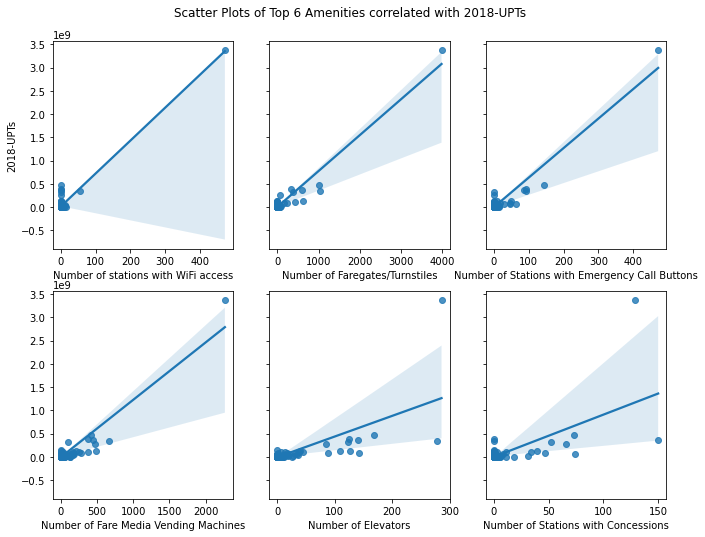

In [28]:
# import pandas, numpy, and matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.width', 200)
pd.set_option('display.max_columns', 7)
pd.set_option('display.max_rows', 200)
pd.options.display.float_format = '{:,.2f}'.format


# generate a correlation matrix

# show scatter plots
fig, axes = plt.subplots(2,3, sharey=True, figsize = (11,8))
sns.regplot(comfortsUpt['Number of stations with WiFi access'], comfortsUpt['2018'], ax=axes[0,0])
sns.regplot(comfortsUpt['Number of Faregates/Turnstiles'], comfortsUpt['2018'], ax=axes[0,1])
sns.regplot(comfortsUpt['Number of Stations with Emergency Call Buttons'], comfortsUpt['2018'], ax=axes[0,2])
sns.regplot(comfortsUpt['Number of Fare Media Vending Machines'], comfortsUpt['2018'], ax=axes[1,0])
sns.regplot(comfortsUpt['Number of Elevators'], comfortsUpt['2018'], ax=axes[1,1])
sns.regplot(comfortsUpt['Number of Stations with Concessions'], comfortsUpt['2018'], ax=axes[1,2])
axes[0,0].set_xlabel("Number of stations with WiFi access")
axes[0,0].set_ylabel("2018-UPTs")
axes[0,1].set_xlabel("Number of Faregates/Turnstiles")
axes[0,1].set_ylabel("")
axes[0,2].set_xlabel("Number of Stations with Emergency Call Buttons")
axes[0,2].set_ylabel("")
axes[1,0].set_xlabel("Number of Fare Media Vending Machines")
axes[1,0].set_ylabel("")
axes[1,1].set_xlabel("Number of Elevators")
axes[1,1].set_ylabel("")
axes[1,2].set_xlabel("Number of Stations with Concessions")
axes[1,2].set_ylabel("")
plt.suptitle("Scatter Plots of Top 6 Amenities correlated with 2018-UPTs")
#plt.tight_layout()
fig.subplots_adjust(top=0.92)
plt.show()



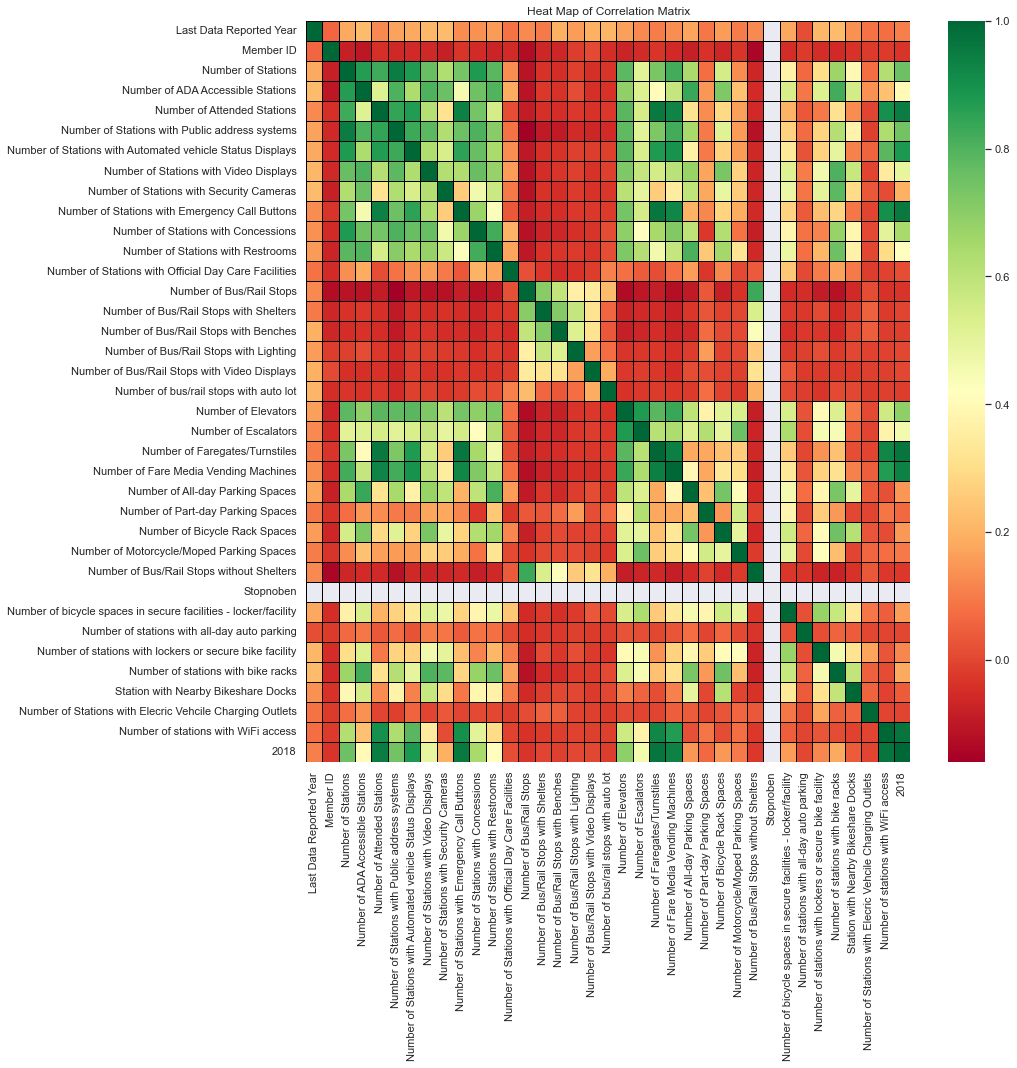

In [29]:
# generate a heat map
sns.set(rc = {'figure.figsize':(15,15)})
sns.heatmap(correlationDF, xticklabels=correlationDF.columns, yticklabels=correlationDF.columns, linewidths=1.0, linecolor="black", cmap="RdYlGn")
plt.title('Heat Map of Correlation Matrix')
plt.tight_layout()
plt.show()

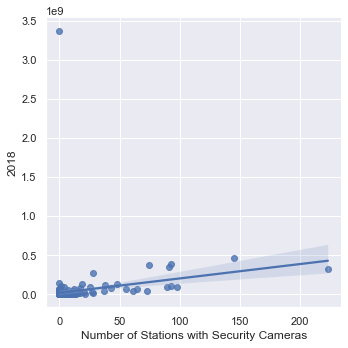

In [30]:
sns.lmplot(x='Number of Stations with Security Cameras', y='2018', data=comfortsUpt)

C:\Users\bamme\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\bamme\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Number of Stations with Emergency Call Buttons', ylabel='Density'>

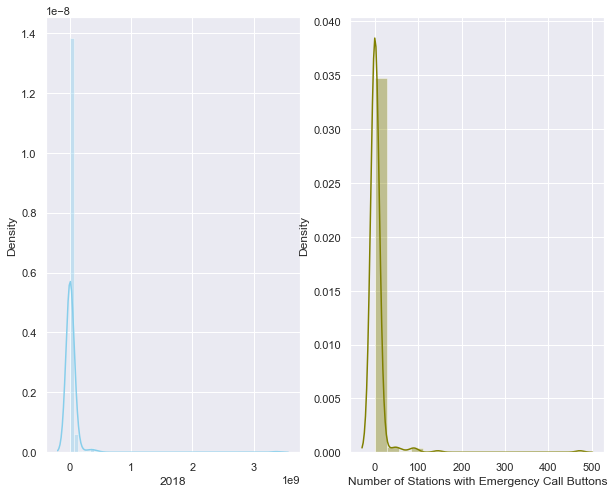

In [31]:
# Import library
import seaborn as sns
import matplotlib.pyplot as plt
 
# Create subplots 
f, axes = plt.subplots(1, 2, figsize=(10, 8))
# Plot Histogram plot with total_UPT column
sns.distplot( comfortsUpt["2018"] , color="skyblue", ax=axes[0])
# Plot Histogram plot with Emergency Call Buttons column
sns.distplot( comfortsUpt["Number of Stations with Emergency Call Buttons"] , color="olive", ax=axes[1])

C:\Users\bamme\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\bamme\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Number of Faregates/Turnstiles', ylabel='Density'>

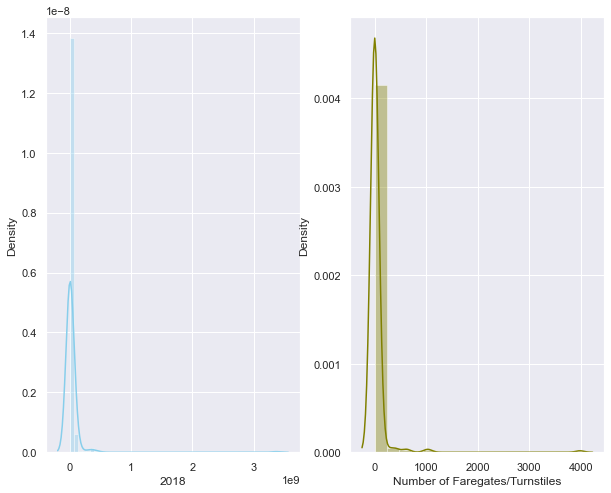

In [32]:
# Create subplots 
f, axes = plt.subplots(1, 2, figsize=(10, 8))
# Plot Histogram plot with total_UPT column
sns.distplot( comfortsUpt["2018"] , color="skyblue", ax=axes[0])
# Plot Histogram plot with Turnstiles column
sns.distplot( comfortsUpt['Number of Faregates/Turnstiles'] , color="olive", ax=axes[1])

In [33]:
comfortsUpt.shape

(293, 45)

In [34]:
print(comfortsUpt.columns)

Index(['Last Data Reported Year', 'Organization Name', 'Organization Short Name', 'City', 'State', 'Country', 'Member ID', 'Type of Facility', 'Number of Stations',
       'Number of ADA Accessible Stations', 'Number of Attended Stations', 'Number of Stations with Public address systems', 'Number of Stations with Automated vehicle Status Displays',
       'Number of Stations with Video Displays', 'Number of Stations with Security Cameras', 'Number of Stations with Emergency Call Buttons', 'Number of Stations with Concessions',
       'Number of Stations with Restrooms', 'Number of Stations with Official Day Care Facilities', 'Number of Bus/Rail Stops', 'Number of Bus/Rail Stops with Shelters',
       'Number of Bus/Rail Stops with Benches', 'Number of Bus/Rail Stops with Lighting', 'Number of Bus/Rail Stops with Video Displays', 'Number of bus/rail stops with auto lot',
       'Number of Elevators', 'Number of Escalators', 'Number of Faregates/Turnstiles', 'Number of Fare Media Vending

In [35]:
comfortsUpt2 = comfortsUpt #.iloc[:,-36:]
#comfortsUpt2.drop(comfortsUpt2.columns[[35]], axis = 1, inplace = True)

In [36]:
# Dropping highly correlated variables and insignificant variables
#comfortsUpt2 = comfortsUpt2.drop('Number of ADA Accessible Stations', 1,)
comfortsUpt2 = comfortsUpt2.drop(['Last Data Reported Year', 'Organization Name', 'Organization Short Name', 'City', 'State', 'Country', 'Member ID',
                                  'Type of Facility', 'Number of ADA Accessible Stations', 'Number of Stations with Video Displays', 
                                  'Number of Stations with Security Cameras', 'Number of Stations with Restrooms', 
                                  'Number of Stations with Official Day Care Facilities', 'Number of Bus/Rail Stops', 
                                  'Number of Bus/Rail Stops with Shelters', 'Number of Bus/Rail Stops with Benches', 'Number of Bus/Rail Stops with Lighting',
                                  'Number of Bus/Rail Stops with Video Displays', 'Number of bus/rail stops with auto lot', 'Number of Escalators', 
                                  'Number of All-day Parking Spaces', 'Number of Part-day Parking Spaces', 'Number of Bicycle Rack Spaces', 
                                  'Number of Motorcycle/Moped Parking Spaces', 'Number of Bus/Rail Stops without Shelters', 'Stopnoben', 
                                  'Number of bicycle spaces in secure facilities - locker/facility', 'Number of stations with all-day auto parking',
                                  'Number of stations with lockers or secure bike facility', 'Number of stations with bike racks', 
                                  'Station with Nearby Bikeshare Docks', 'Number of Stations with Elecric Vehcile Charging Outlets',
                                  'AgencyFinal', 'Agency'], axis = 1)

In [37]:
print(comfortsUpt2.columns)

Index(['Number of Stations', 'Number of Attended Stations', 'Number of Stations with Public address systems', 'Number of Stations with Automated vehicle Status Displays',
       'Number of Stations with Emergency Call Buttons', 'Number of Stations with Concessions', 'Number of Elevators', 'Number of Faregates/Turnstiles', 'Number of Fare Media Vending Machines',
       'Number of stations with WiFi access', '2018'],
      dtype='object')


In [38]:
comfortsUpt2.rename(columns = {'Number of Stations':'stations', 
                               'Number of Attended Stations':'attnd_station', 
                               'Number of Stations with Public address systems':'pa_sys', 
                               'Number of Stations with Automated vehicle Status Displays':'auto_veh_status',
                               'Number of Stations with Emergency Call Buttons':'emerg_call_button', 
                               'Number of Stations with Concessions':'concessions', 
                               'Number of Elevators':'elevators', 
                               'Number of Faregates/Turnstiles':'faregates_turnstiles', 
                               'Number of Fare Media Vending Machines':'fare_vend_mach',
                               'Number of stations with WiFi access':'wifi_access', 
                               '2018':'UPT'}, inplace = True)

print(comfortsUpt2.columns)

Index(['stations', 'attnd_station', 'pa_sys', 'auto_veh_status', 'emerg_call_button', 'concessions', 'elevators', 'faregates_turnstiles', 'fare_vend_mach', 'wifi_access', 'UPT'], dtype='object')


In [39]:
from sklearn.model_selection import train_test_split

# We specify random seed so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(comfortsUpt2, train_size = 0.7, test_size = 0.3, random_state = 50)

In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Applying scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['stations', 'attnd_station', 'pa_sys', 'auto_veh_status', 'emerg_call_button', 'concessions', 'elevators', 
            'faregates_turnstiles', 'fare_vend_mach', 'wifi_access', 'UPT']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train

,stations,attnd_station,pa_sys,...,fare_vend_mach,wifi_access,UPT
147,0.00,0.00,0.00,...,0.00,0.00,0.01
268,0.00,0.00,0.00,...,0.00,0.00,0.00
281,0.00,0.00,0.00,...,0.00,0.00,0.00
125,0.00,0.00,0.00,...,0.00,0.00,0.00
102,0.02,0.00,0.00,...,0.00,0.00,0.00
...,...,...,...,...,...,...,...
72,0.03,0.03,0.00,...,0.00,0.00,0.00
140,0.03,0.00,0.00,...,0.00,0.00,0.00
305,0.01,0.01,0.02,...,0.00,0.00,0.00
114,0.02,0.02,0.02,...,0.00,0.00,0.00


In [41]:
# Dividing the training data set into X and Y
y_train = df_train.pop('UPT')

X_train = df_train

In [42]:
#Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    UPT   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     1489.
Date:                Sat, 18 Jun 2022   Prob (F-statistic):          1.54e-177
Time:                        13:29:59   Log-Likelihood:                 695.96
No. Observations:                 205   AIC:                            -1370.
Df Residuals:                     194   BIC:                            -1333.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0003      0.001      0.456      0.649      -0.001       0.002
stations                 0.1217      0.031      3.889      0.000       0.060       0.183
attnd_station            0.0986      0.058      1.696      0.091      -0.016       0.213
pa_sys                  -0.1111      0.031     -3.608      0.000      -0.172      -0.050
auto_veh_status         -0.0246      0.031     -0.797      0.427      -0.085       0.036
emerg_call_button        0.2780      0.044      6.380      0.000       0.192       0.364
concessions             -0.0129      0.017     -0.758      0.450      -0.046       0.021
elevators               -0.0633      0.016     -3.850      0.000      -0.096      -0.031
faregates_turnstiles     0.0685      0.078      0.874      0.383      -0.086       0.223
fare_vend_mach           0.2857      0.061      4.670      0.000       0.165       0.406
wifi_access              0.3515      0.053      6.583      0.000       0.246       0.457
==============================================================================
Omnibus:                       74.384   Durbin-Watson:                   2.020
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1134.110
Skew:                           0.898   Prob(JB):                    5.38e-247
Kurtosis:                      14.382   Cond. No.                         175.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
# Checking for the VIF values of the variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating a dataframe that will contain the names of all the feature variables and their VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,faregates_turnstiles,101.42
8,fare_vend_mach,70.83
1,attnd_station,57.68
9,wifi_access,41.36
4,emerg_call_button,33.57
2,pa_sys,28.46
0,stations,27.39
3,auto_veh_status,19.35
6,elevators,12.91
5,concessions,9.92


In [44]:
# Dropping highly correlated variables and insignificant variables
X = X_train.drop('faregates_turnstiles', 1,)

# Build a fitted model after dropping the variable
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

# Printing the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    UPT   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     1656.
Date:                Sat, 18 Jun 2022   Prob (F-statistic):          5.37e-179
Time:                        13:30:08   Log-Likelihood:                 695.56
No. Observations:                 205   AIC:                            -1371.
Df Residuals:                     195   BIC:                            -1338.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0002      0.00

C:\Users\bamme\AppData\Local\Temp\ipykernel_25724\290710718.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = X_train.drop('faregates_turnstiles', 1,)


In [45]:
# Calculating the VIFs again for the new model after dropping semi-furnished

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,fare_vend_mach,60.46
8,wifi_access,40.18
1,attnd_station,39.60
0,stations,27.06
3,auto_veh_status,19.24
2,pa_sys,19.02
4,emerg_call_button,16.96
6,elevators,11.99
5,concessions,9.86


In [46]:
X = X.drop('attnd_station', 1)

# Build a second fitted model
X_train_lm = sm.add_constant(X)
lr_3 = sm.OLS(y_train, X_train_lm).fit()

# Printing the summary of the model
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    UPT   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     1806.
Date:                Sat, 18 Jun 2022   Prob (F-statistic):          4.17e-179
Time:                        13:30:11   Log-Likelihood:                 691.85
No. Observations:                 205   AIC:                            -1366.
Df Residuals:                     196   BIC:                            -1336.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0004      0.00

C:\Users\bamme\AppData\Local\Temp\ipykernel_25724\1235706522.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = X.drop('attnd_station', 1)


In [47]:
# Calculating the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,fare_vend_mach,58.00
0,stations,25.81
7,wifi_access,19.45
2,auto_veh_status,18.55
3,emerg_call_button,16.34
1,pa_sys,15.37
5,elevators,8.33
4,concessions,7.10


In [48]:
X = X.drop('elevators', 1)

X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    UPT   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     1999.
Date:                Sat, 18 Jun 2022   Prob (F-statistic):          3.11e-179
Time:                        13:30:15   Log-Likelihood:                 688.14
No. Observations:                 205   AIC:                            -1360.
Df Residuals:                     197   BIC:                            -1334.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0003      0.00

C:\Users\bamme\AppData\Local\Temp\ipykernel_25724\4159848561.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = X.drop('elevators', 1)


In [49]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,fare_vend_mach,29.90
0,stations,25.66
2,auto_veh_status,17.71
1,pa_sys,14.63
3,emerg_call_button,13.84
6,wifi_access,9.20
4,concessions,7.04


In [50]:
X = X.drop('fare_vend_mach', 1)

X_train_lm = sm.add_constant(X)

lr_5 = sm.OLS(y_train, X_train_lm).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    UPT   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     2152.
Date:                Sat, 18 Jun 2022   Prob (F-statistic):          2.59e-177
Time:                        13:30:18   Log-Likelihood:                 679.50
No. Observations:                 205   AIC:                            -1345.
Df Residuals:                     198   BIC:                            -1322.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0001      0.00

C:\Users\bamme\AppData\Local\Temp\ipykernel_25724\2384500170.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = X.drop('fare_vend_mach', 1)


In [51]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,stations,24.90
3,emerg_call_button,13.75
1,pa_sys,13.07
2,auto_veh_status,11.48
5,wifi_access,7.27
4,concessions,6.61


In [52]:
X = X.drop('concessions', 1)

X_train_lm = sm.add_constant(X)

lr_6 = sm.OLS(y_train, X_train_lm).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    UPT   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                     2596.
Date:                Sat, 18 Jun 2022   Prob (F-statistic):          4.84e-179
Time:                        13:30:23   Log-Likelihood:                 679.49
No. Observations:                 205   AIC:                            -1347.
Df Residuals:                     199   BIC:                            -1327.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0001      0.00

C:\Users\bamme\AppData\Local\Temp\ipykernel_25724\3511939589.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = X.drop('concessions', 1)


In [53]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,stations,15.71
3,emerg_call_button,13.47
1,pa_sys,12.36
2,auto_veh_status,11.40
4,wifi_access,6.56


C:\Users\bamme\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

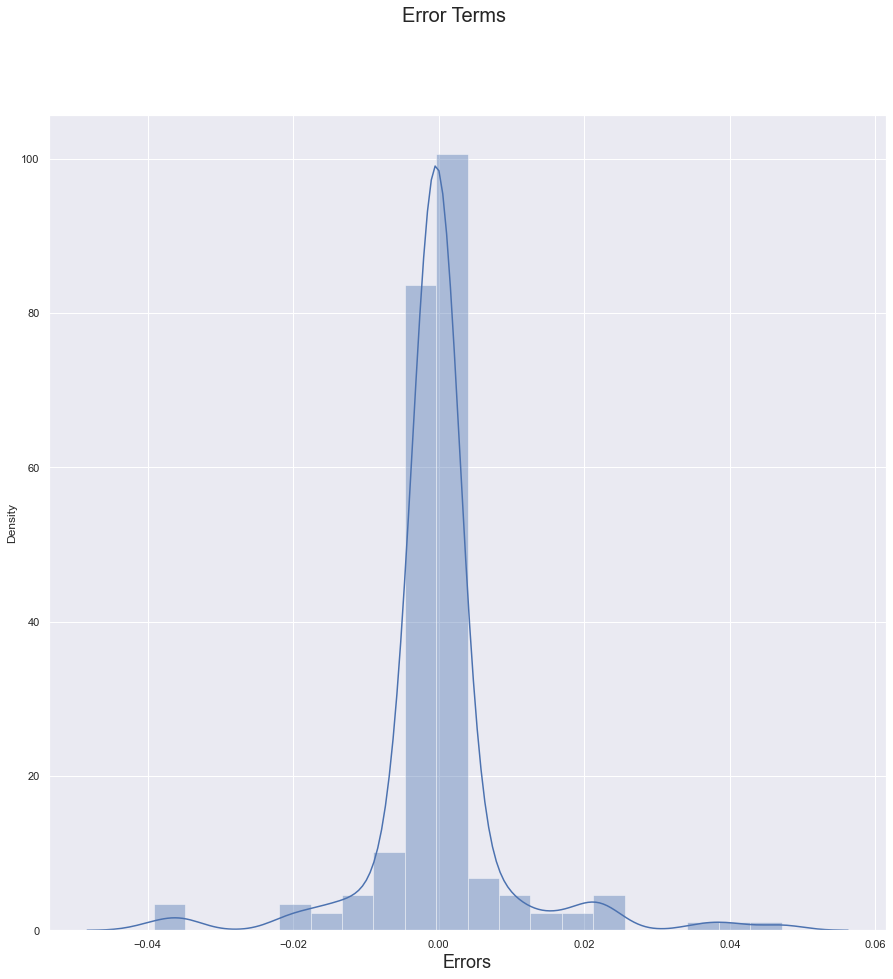

In [54]:
import seaborn as sns
y_train_price = lr_6.predict(X_train_lm)
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [55]:
X.columns

Index(['stations', 'pa_sys', 'auto_veh_status', 'emerg_call_button', 'wifi_access'], dtype='object')

In [56]:

num_vars = ['stations', 'attnd_station', 'pa_sys', 'auto_veh_status', 'emerg_call_button', 'concessions', 'elevators', 
            'faregates_turnstiles', 'fare_vend_mach', 'wifi_access', 'UPT']

df_test[num_vars] = scaler.transform(df_test[num_vars])

df_test

,stations,attnd_station,pa_sys,...,fare_vend_mach,wifi_access,UPT
280,0.01,0.00,0.00,...,0.00,0.00,0.00
41,0.09,0.05,0.11,...,0.07,0.00,0.02
276,0.00,0.00,0.00,...,0.00,0.00,0.00
39,0.01,0.01,0.01,...,0.00,0.00,0.00
208,0.00,0.00,0.00,...,0.00,0.00,0.00
112,0.59,0.16,0.55,...,0.04,0.00,0.09
103,0.21,0.00,0.05,...,0.11,0.00,0.03
25,0.00,0.00,0.00,...,0.00,0.00,0.00
92,0.01,0.00,0.00,...,0.00,0.01,0.01
162,0.00,0.00,0.00,...,0.00,0.00,0.00


In [57]:
# num_vars = ['stations', 'pa_sys', 'auto_veh_status', 'emerg_call_button', 'wifi_access']

y_test = df_test.pop('UPT')
X_test = df_test

# Adding constant variable to test dataframe
X_test_m6 = sm.add_constant(X_test)

# Creating X_test_m4 dataframe by dropping variables from X_test_m4
X_test_m6 = X_test_m6.drop(['faregates_turnstiles','attnd_station','elevators','concessions','fare_vend_mach'], axis = 1)

# Making predictions using the final model
y_pred_m6 = lr_6.predict(X_test_m6)

In [58]:
print(y_pred_m6)

280   0.00
41    0.00
276   0.00
39    0.00
208   0.00
112   0.06
103   0.03
25    0.00
92    0.01
162   0.00
289   0.00
194   0.00
36    0.00
84    0.00
93    0.01
157   0.00
151   0.00
107   0.00
119   0.00
78    0.00
75    0.00
130   0.00
177   0.00
21    0.00
247   0.00
65    0.00
89    0.00
195   0.00
206   0.00
248   0.00
299   0.00
50    0.01
260   0.00
307   0.00
259   0.00
63    0.04
9     0.00
68    0.00
11    0.00
26    0.00
261   0.00
267   0.00
239   0.01
264   0.00
308   0.00
33    0.00
19    0.04
16    0.00
255   0.01
83    0.01
263   0.00
242   0.00
76    0.00
104   0.00
183   0.00
129   0.02
169   0.00
35    0.00
17    0.01
85    0.00
252   0.00
233   0.01
225   0.00
117   0.01
188   0.00
149   0.02
48    0.00
128   0.00
3     0.00
113   0.00
217   0.00
1     0.01
212   0.00
71    0.00
283   0.00
160   0.00
69    0.00
232   0.00
40    0.00
257   0.00
24    0.00
288   0.00
277   0.00
223   0.00
226   0.00
145   0.00
290   0.00
250   0.00
dtype: float64


In [59]:
# create a series
a = pd.Series(y_pred_m6, name = "prediction")
  
# create a series
b = pd.Series(y_test, name = "test")
  
# merge both series 
df_comp = pd.merge(a, b, right_index = True,
               left_index = True)
# show the dataframe
df_comp

,prediction,test
280,0.00,0.00
41,0.00,0.02
276,0.00,0.00
39,0.00,0.00
208,0.00,0.00
112,0.06,0.09
103,0.03,0.03
25,0.00,0.00
92,0.01,0.01
162,0.00,0.00


In [60]:
# create a dictonary
data = {"prediction": y_pred_m6,
        "test": y_test}
  
# Concatenating the series side
# by side as depicted by axis=1
# If you want to concatenate the 
# series one below the other
# change the axis to zero.
df = pd.concat(data,
               axis = 1)
  
# show the dataframe
df

,prediction,test
280,0.00,0.00
41,0.00,0.02
276,0.00,0.00
39,0.00,0.00
208,0.00,0.00
112,0.06,0.09
103,0.03,0.03
25,0.00,0.00
92,0.01,0.01
162,0.00,0.00


In [61]:
from sklearn.metrics import r2_score
r2_score(y_true = y_test, y_pred = y_pred_m6)

0.8105332060847584

In [62]:
import pandas as pd
import seaborn as sns

# resetting index before melting to save the current index in 'index' column...
df = df.reset_index().melt('index', var_name='cols',  value_name='vals')

display(df)

,index,cols,vals
0,280,prediction,0.00
1,41,prediction,0.00
2,276,prediction,0.00
3,39,prediction,0.00
4,208,prediction,0.00
5,112,prediction,0.06
6,103,prediction,0.03
7,25,prediction,0.00
8,92,prediction,0.01
9,162,prediction,0.00


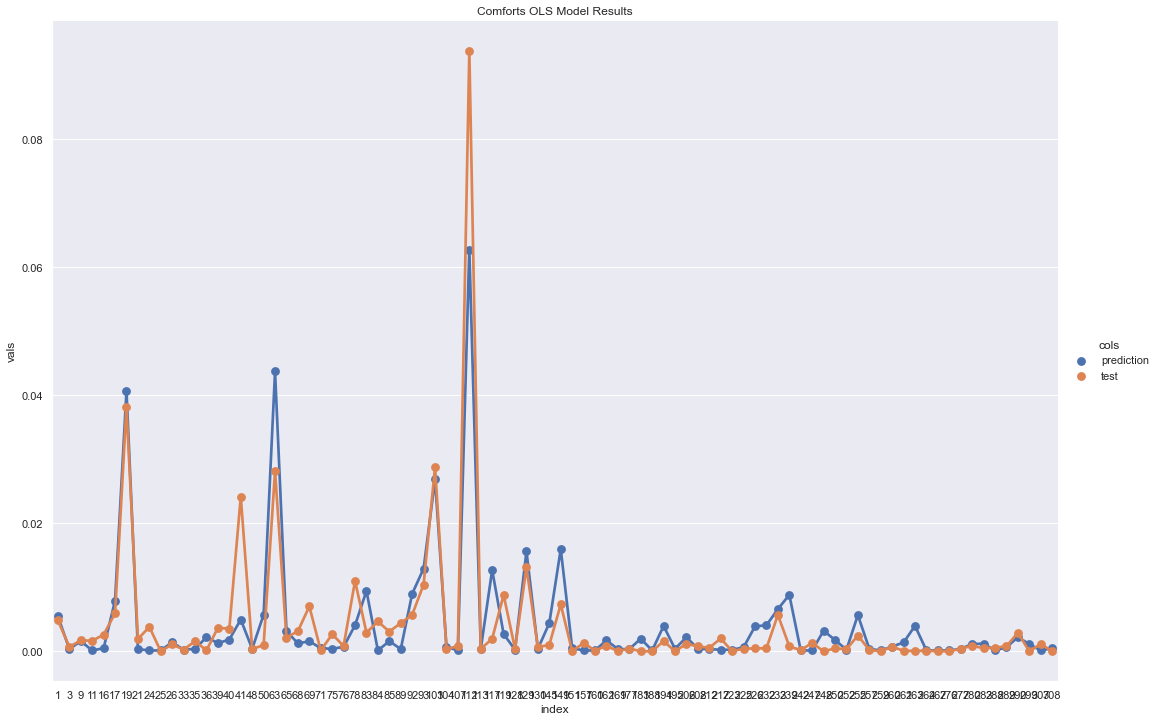

In [63]:
#sns.set(rc={'figure.figsize':(25,20)})

#df = df.reset_index().melt('index', var_name='cols',  value_name='vals')
g = sns.catplot(x="index", y="vals", hue='cols', height=10, aspect=15/10, data=df, kind='point').set(title='Comforts OLS Model Results')

In [64]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from scipy import stats
from statsmodels.formula.api import logit

In [65]:
comfortsUpt2["UPT"] = (comfortsUpt2["UPT"] > 0).astype(float)
print(comfortsUpt2.head())


   stations  attnd_station  pa_sys  ...  fare_vend_mach  wifi_access  UPT
0        15              4       0  ...               0         0.00 1.00
1        23              3       3  ...               0         0.00 1.00
2        29              3       3  ...               0         0.00 1.00
3         1              1       1  ...               0         0.00 1.00
4         0              0       0  ...               0         0.00 1.00

[5 rows x 11 columns]


In [66]:
# comfortsUpt.to_csv('C:\\Users\\bamme\\OneDrive\\Documents\\Chip_Documents\\Syracuse\\IST718\\Project\\comfortsUpt.csv', index=False)

In [67]:
import os
os. getcwd()

'C:\\Users\\bamme\\OneDrive\\Documents\\Chip_Documents\\Syracuse\\IST718\\Project'

In [68]:
print(comfortsUpt2['UPT'].describe())

count   293.00
mean      0.87
std       0.33
min       0.00
25%       1.00
50%       1.00
75%       1.00
max       1.00
Name: UPT, dtype: float64


In [69]:
upt_mod = logit("UPT ~ stations + pa_sys + auto_veh_status + emerg_call_button + wifi_access", comfortsUpt2).fit()

Optimization terminated successfully.
         Current function value: 0.336833
         Iterations 12


In [70]:
print(upt_mod.summary())

                           Logit Regression Results                           
Dep. Variable:                    UPT   No. Observations:                  293
Model:                          Logit   Df Residuals:                      287
Method:                           MLE   Df Model:                            5
Date:                Sat, 18 Jun 2022   Pseudo R-squ.:                  0.1119
Time:                        13:32:41   Log-Likelihood:                -98.692
converged:                       True   LL-Null:                       -111.12
Covariance Type:            nonrobust   LLR p-value:                 0.0001484
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.2632      0.220      5.748      0.000       0.833       1.694
stations              0.0892      0.069      1.287      0.198      -0.047       0.225
pa_sys               -0.

In [71]:
upt_mod.pred_table()

array([[  0.,  37.],
       [  0., 256.]])

In [72]:
mfx = upt_mod.get_margeff()
print(mfx.summary())

        Logit Marginal Effects       
Dep. Variable:                    UPT
Method:                          dydx
At:                           overall
                       dy/dx    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
stations              0.0092      0.007      1.285      0.199      -0.005       0.023
pa_sys               -0.0094      0.007     -1.276      0.202      -0.024       0.005
auto_veh_status       0.0528      0.028      1.866      0.062      -0.003       0.108
emerg_call_button     0.0026      0.009      0.288      0.773      -0.015       0.020
wifi_access           0.0424      0.046      0.918      0.359      -0.048       0.133


In [73]:
respondent100 = comfortsUpt2.iloc[100]
print(respondent100)

stations               3.00
attnd_station          0.00
pa_sys                 1.00
auto_veh_status        3.00
emerg_call_button      0.00
concessions            0.00
elevators              0.00
faregates_turnstiles   0.00
fare_vend_mach         0.00
wifi_access            0.00
UPT                    1.00
Name: 105, dtype: float64


In [74]:
resp = dict(
    zip(
        range(1, 5),
        respondent100[
            [
                "stations", 
                "pa_sys", 
                "auto_veh_status", 
                "emerg_call_button", 
                "wifi_access"
            ]
        ].tolist(),
    )
)
resp.update({0: 1})
print(resp)

{1: 3.0, 2: 1.0, 3: 3.0, 4: 0.0, 0: 1}


In [75]:
mfx = upt_mod.get_margeff(atexog=resp)
print(mfx.summary())

        Logit Marginal Effects       
Dep. Variable:                    UPT
Method:                          dydx
At:                           overall
                       dy/dx    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
stations              0.0037      0.004      0.948      0.343      -0.004       0.011
pa_sys               -0.0038      0.004     -0.942      0.346      -0.012       0.004
auto_veh_status       0.0214      0.005      4.664      0.000       0.012       0.030
emerg_call_button     0.0010      0.004      0.281      0.779      -0.006       0.008
wifi_access           0.0172      0.024      0.710      0.478      -0.030       0.065


In [76]:
respondent100 = comfortsUpt2.iloc[[100]]
upt_mod.predict(respondent100)



105   0.95
dtype: float64

In [77]:
upt_mod.fittedvalues[100]

2.1840783820455383

In [78]:
upt_mod.model.cdf(upt_mod.fittedvalues[100])

0.8988106051464918

In [79]:
import matplotlib.pyplot as plt
import numpy as np

def ecdf(a):
    x, counts = np.unique(a, return_counts=True)
    y = np.cumsum(counts)
    x = np.insert(x, 0, x[0])
    y = np.insert(y/y[-1], 0, 0.)
    plt.plot(x, y, drawstyle='steps-post')
    plt.grid(True)
    #plt.savefig('ecdf.png')

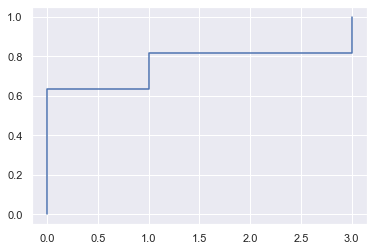

In [80]:
xvec = respondent100 
ecdf(xvec)

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [82]:
comfortsUpt.columns #stations + pa_sys + auto_veh_status + emerg_call_button + wifi_access

Index(['Last Data Reported Year', 'Organization Name', 'Organization Short Name', 'City', 'State', 'Country', 'Member ID', 'Type of Facility', 'Number of Stations',
       'Number of ADA Accessible Stations', 'Number of Attended Stations', 'Number of Stations with Public address systems', 'Number of Stations with Automated vehicle Status Displays',
       'Number of Stations with Video Displays', 'Number of Stations with Security Cameras', 'Number of Stations with Emergency Call Buttons', 'Number of Stations with Concessions',
       'Number of Stations with Restrooms', 'Number of Stations with Official Day Care Facilities', 'Number of Bus/Rail Stops', 'Number of Bus/Rail Stops with Shelters',
       'Number of Bus/Rail Stops with Benches', 'Number of Bus/Rail Stops with Lighting', 'Number of Bus/Rail Stops with Video Displays', 'Number of bus/rail stops with auto lot',
       'Number of Elevators', 'Number of Escalators', 'Number of Faregates/Turnstiles', 'Number of Fare Media Vending

In [83]:
RF_df = comfortsUpt[['Number of Stations', 'Number of Stations with Public address systems', 
                     'Number of Stations with Automated vehicle Status Displays', 'Number of Stations with Emergency Call Buttons', 
                     'Number of stations with WiFi access', '2018']]
#RF_df = RF_df[RF_df['UPT']> 0]
RF_df.describe()

,Number of Stations,Number of Stations with Public address systems,Number of Stations with Automated vehicle Status Displays,Number of Stations with Emergency Call Buttons,Number of stations with WiFi access,2018
count,293.00,293.00,293.00,293.00,293.00,293.00
mean,14.41,9.06,7.81,4.30,2.26,"29,554,637.94"
std,43.57,35.18,35.16,30.71,27.76,"203,436,726.23"
min,0.00,0.00,0.00,0.00,0.00,0.00
25%,1.00,0.00,0.00,0.00,0.00,"745,682.00"
50%,2.00,0.00,0.00,0.00,0.00,"2,621,622.00"
75%,8.00,1.00,2.00,0.00,0.00,"10,411,765.00"
max,472.00,380.00,472.00,472.00,472.00,"3,369,354,401.00"


In [84]:
RF_df.columns

Index(['Number of Stations', 'Number of Stations with Public address systems', 'Number of Stations with Automated vehicle Status Displays', 'Number of Stations with Emergency Call Buttons',
       'Number of stations with WiFi access', '2018'],
      dtype='object')

In [85]:
RF_df

,Number of Stations,Number of Stations with Public address systems,Number of Stations with Automated vehicle Status Displays,Number of Stations with Emergency Call Buttons,Number of stations with WiFi access,2018
0,15,0,6,0.00,0.00,"39,934,087.00"
1,23,3,0,0.00,0.00,"16,224,721.00"
2,29,3,3,0.00,0.00,"16,224,721.00"
3,1,1,1,0.00,0.00,"2,351,440.00"
4,0,0,0,0.00,0.00,"53,343,328.00"
...,...,...,...,...,...,...
304,3,1,1,0.00,1.00,"1,070,490.00"
305,7,7,1,7.00,0.00,"1,436,790.00"
306,1,0,0,0.00,0.00,0.00
307,0,0,0,0.00,0.00,"3,827,710.00"


In [86]:
upt = np.array(RF_df['2018'])
RF_df = RF_df.drop('2018', axis = 1)

feature_list = list(RF_df.columns)

features = np.array(RF_df)

In [87]:
train_features, test_features, train_trips, test_trips = train_test_split(features, upt, test_size = 0.25, random_state = 11)

print('Training Features Shape:', train_features.shape)
print('Training Trips Shape:', train_trips.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Trips Shape:', test_trips.shape)

Training Features Shape: (219, 5)
Training Trips Shape: (219,)
Testing Features Shape: (74, 5)
Testing Trips Shape: (74,)


In [88]:
rf = RandomForestRegressor(n_estimators = 10000, random_state = 11)
rf.fit(train_features, train_trips)

RandomForestRegressor(n_estimators=10000, random_state=11)

In [89]:
import math

Mean Absolute Error: 20163918.29 UPTs
Root mean square Error: 4490.42517920074 UPTs


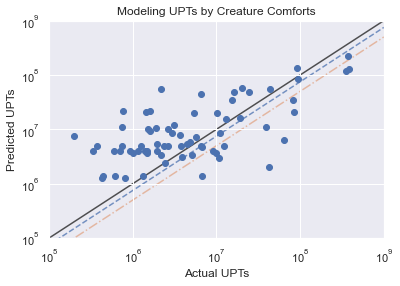

In [95]:
predictions = rf.predict(test_features)
errors = abs(predictions - test_trips)

print('Mean Absolute Error:', round(np.mean(errors), 2), 'UPTs')

plt.scatter(test_trips, predictions)
plt.xlabel("Actual UPTs")
plt.ylabel("Predicted UPTs")
plt.yscale(value = "log")
plt.ylim([100000,1000000000])
plt.xscale(value = "log")
plt.xlim([100000,1000000000])
plt.plot([100000,1000000000], [100000,1000000000], 'k-', alpha=0.75, zorder=0)
plt.plot([100000,1000000000], [75000,750000000], '--', alpha=0.75, zorder=0)
plt.plot([100000,1000000000], [50000,500000000], '-.', alpha=0.50, zorder=0)

plt.title('Modeling UPTs by Creature Comforts')

print('Root mean square Error:', math.sqrt(round(np.mean(errors), 2)), 'UPTs')

In [96]:
print(errors)

[6.43186642e+07 5.15862533e+07 8.93776534e+06 4.67919604e+07
 2.76925337e+07 5.62056736e+06 1.09439906e+06 2.07801738e+06
 3.08740338e+06 6.18232813e+06 1.90689127e+07 7.24957727e+06
 1.01034865e+07 7.84317695e+06 8.73175532e+06 3.69436638e+06
 2.28090982e+06 3.21412580e+07 4.31796733e+04 7.61135630e+06
 3.31582938e+06 3.77236165e+07 4.17545773e+06 4.54958373e+06
 3.98047603e+07 2.58306019e+06 4.28489721e+06 1.51164588e+06
 8.24612132e+05 1.13460473e+06 5.55293526e+04 5.36476965e+06
 1.96112730e+07 2.61748987e+06 9.24815353e+05 3.32562351e+06
 2.15858738e+06 8.77584814e+06 3.42990338e+06 2.86884638e+06
 3.65862773e+06 2.04950642e+07 8.30754479e+05 7.40332647e+06
 1.44172502e+07 3.34732328e+06 5.83840590e+07 1.09210373e+07
 1.22166733e+06 7.56233353e+05 2.65574554e+06 2.00175021e+06
 1.51426667e+08 5.14475781e+06 2.20936952e+07 1.77503849e+06
 4.92113973e+06 1.02293715e+07 2.41688047e+07 3.66513815e+07
 1.21513488e+07 3.48479724e+06 2.55109182e+06 4.32149037e+07
 1.53923227e+06 2.132656

In [97]:
a = errors
mask = a == 0
a[mask] = 1
print(a)

[6.43186642e+07 5.15862533e+07 8.93776534e+06 4.67919604e+07
 2.76925337e+07 5.62056736e+06 1.09439906e+06 2.07801738e+06
 3.08740338e+06 6.18232813e+06 1.90689127e+07 7.24957727e+06
 1.01034865e+07 7.84317695e+06 8.73175532e+06 3.69436638e+06
 2.28090982e+06 3.21412580e+07 4.31796733e+04 7.61135630e+06
 3.31582938e+06 3.77236165e+07 4.17545773e+06 4.54958373e+06
 3.98047603e+07 2.58306019e+06 4.28489721e+06 1.51164588e+06
 8.24612132e+05 1.13460473e+06 5.55293526e+04 5.36476965e+06
 1.96112730e+07 2.61748987e+06 9.24815353e+05 3.32562351e+06
 2.15858738e+06 8.77584814e+06 3.42990338e+06 2.86884638e+06
 3.65862773e+06 2.04950642e+07 8.30754479e+05 7.40332647e+06
 1.44172502e+07 3.34732328e+06 5.83840590e+07 1.09210373e+07
 1.22166733e+06 7.56233353e+05 2.65574554e+06 2.00175021e+06
 1.51426667e+08 5.14475781e+06 2.20936952e+07 1.77503849e+06
 4.92113973e+06 1.02293715e+07 2.41688047e+07 3.66513815e+07
 1.21513488e+07 3.48479724e+06 2.55109182e+06 4.32149037e+07
 1.53923227e+06 2.132656

In [98]:
print(test_trips)

[8.53474050e+07 0.00000000e+00 3.12095500e+06 8.14168570e+07
 3.88728150e+07 2.97992800e+06 4.82755200e+06 1.94703800e+06
 9.37652000e+05 9.79648000e+06 1.54064100e+07 1.21707170e+07
 7.34834000e+05 1.58570100e+06 1.91517300e+06 3.30689000e+05
 2.62162200e+06 1.62247210e+07 2.40699900e+06 2.61979100e+06
 7.09226000e+05 6.54717400e+06 7.45682000e+05 3.71556000e+05
 4.18425480e+07 1.39125600e+06 3.65682000e+06 5.72009500e+06
 4.47701600e+06 3.78653500e+06 1.31047200e+06 6.73077100e+06
 1.43679000e+06 9.96662000e+05 4.41186000e+05 0.00000000e+00
 1.47681700e+06 1.53305500e+06 5.95152000e+05 1.15620900e+06
 1.26251200e+06 1.59863100e+06 4.28249000e+05 1.99666000e+05
 5.35677400e+06 1.92052440e+07 6.48500710e+07 9.48269280e+07
 2.18710600e+06 6.09768000e+05 1.29573360e+07 6.70466200e+06
 3.70307249e+08 9.11907400e+06 0.00000000e+00 5.10066200e+06
 0.00000000e+00 1.01431170e+07 2.47772610e+07 1.99860330e+07
 4.41763310e+07 1.92932300e+06 2.35144000e+06 9.24375110e+07
 6.46037200e+06 7.671320

In [99]:
b = test_trips
mask = b == 0
b[mask] = .0001
print(b)

[8.53474050e+07 1.00000000e-04 3.12095500e+06 8.14168570e+07
 3.88728150e+07 2.97992800e+06 4.82755200e+06 1.94703800e+06
 9.37652000e+05 9.79648000e+06 1.54064100e+07 1.21707170e+07
 7.34834000e+05 1.58570100e+06 1.91517300e+06 3.30689000e+05
 2.62162200e+06 1.62247210e+07 2.40699900e+06 2.61979100e+06
 7.09226000e+05 6.54717400e+06 7.45682000e+05 3.71556000e+05
 4.18425480e+07 1.39125600e+06 3.65682000e+06 5.72009500e+06
 4.47701600e+06 3.78653500e+06 1.31047200e+06 6.73077100e+06
 1.43679000e+06 9.96662000e+05 4.41186000e+05 1.00000000e-04
 1.47681700e+06 1.53305500e+06 5.95152000e+05 1.15620900e+06
 1.26251200e+06 1.59863100e+06 4.28249000e+05 1.99666000e+05
 5.35677400e+06 1.92052440e+07 6.48500710e+07 9.48269280e+07
 2.18710600e+06 6.09768000e+05 1.29573360e+07 6.70466200e+06
 3.70307249e+08 9.11907400e+06 1.00000000e-04 5.10066200e+06
 1.00000000e-04 1.01431170e+07 2.47772610e+07 1.99860330e+07
 4.41763310e+07 1.92932300e+06 2.35144000e+06 9.24375110e+07
 6.46037200e+06 7.671320

In [100]:
mape = 100 * (a / b)
print(mape, np.mean(mape))
accuracy = 100 - np.mean(mape)  # 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


[7.53610074e+01 5.15862533e+13 2.86379180e+02 5.74720791e+01
 7.12388174e+01 1.88614200e+02 2.26698555e+01 1.06727110e+02
 3.29269642e+02 6.31076482e+01 1.23772590e+02 5.95657369e+01
 1.37493454e+03 4.94618907e+02 4.55925147e+02 1.11717244e+03
 8.70037642e+01 1.98100528e+02 1.79392153e+00 2.90532959e+02
 4.67527894e+02 5.76181670e+02 5.59951526e+02 1.22446784e+03
 9.51298670e+01 1.85663903e+02 1.17175502e+02 2.64269367e+01
 1.84187890e+01 2.99641951e+01 4.23735514e+00 7.97051281e+01
 1.36493663e+03 2.62625631e+02 2.09620285e+02 3.32562351e+12
 1.46164852e+02 5.72441833e+02 5.76307125e+02 2.48125242e+02
 2.89789541e+02 1.28203846e+03 1.93988656e+02 3.70785536e+03
 2.69140535e+02 1.74292150e+01 9.00292908e+01 1.15168102e+01
 5.58577103e+01 1.24019849e+02 2.04960768e+01 2.98560944e+01
 4.08921692e+01 5.64175465e+01 2.20936952e+13 3.48001591e+01
 4.92113973e+12 1.00850375e+02 9.75442954e+01 1.83384975e+02
 2.75064691e+01 1.80622801e+02 1.08490619e+02 4.67503974e+01
 2.38257528e+01 2.780038

In [101]:
from sklearn.metrics import mean_squared_error as ms

#mse = ms(errors, test_trips)  # actual, prediction
rmse = math.sqrt(round(np.mean(errors), 2))
#print('Mean Squared Error: ', mse)
print('Root Mean Squared Error: ', rmse)
print('Accuracy for Random Forest',100*max(0,rmse))

Root Mean Squared Error:  4490.42517920074
Accuracy for Random Forest 449042.517920074


In [102]:
print('Metrics for Random Forest Trained on Original Data')
print('Average absolute error:', round(np.mean(errors), 2), 'UPTs.')
# Calculate mean absolute percentage error (MAPE)
mape = 100*(errors / test_trips)
# Calculate and display accuracy
accuracy = 100-np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Metrics for Random Forest Trained on Original Data
Average absolute error: 20163918.29 UPTs.
Accuracy: -1107117726687.23 %.


In [103]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Number of Stations   Importance: 0.26
Variable: Number of Stations with Automated vehicle Status Displays Importance: 0.22
Variable: Number of Stations with Public address systems Importance: 0.21
Variable: Number of Stations with Emergency Call Buttons Importance: 0.18
Variable: Number of stations with WiFi access Importance: 0.13
